## Generalize to Gaussian Mixture Models

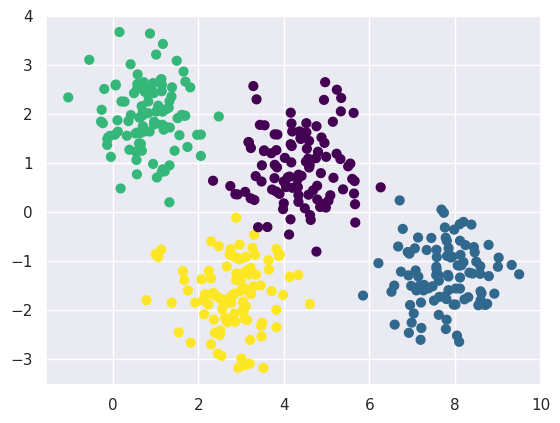

In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [18]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.978 0.022 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.999 0.    0.    0.001]
 [0.    0.    0.    1.   ]]


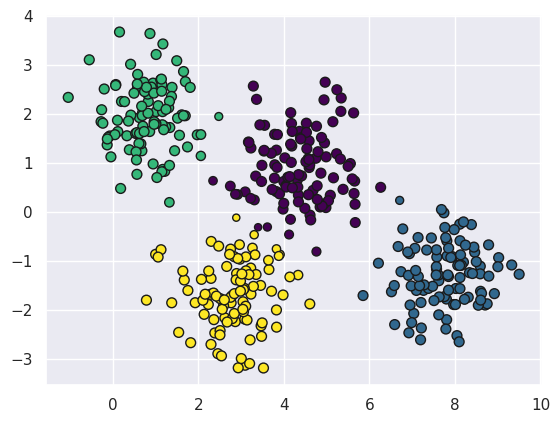

In [19]:
size = probs.max(1)/0.02
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', cmap='viridis', s=size);

**GMM as Density Estimation and Generative Model**

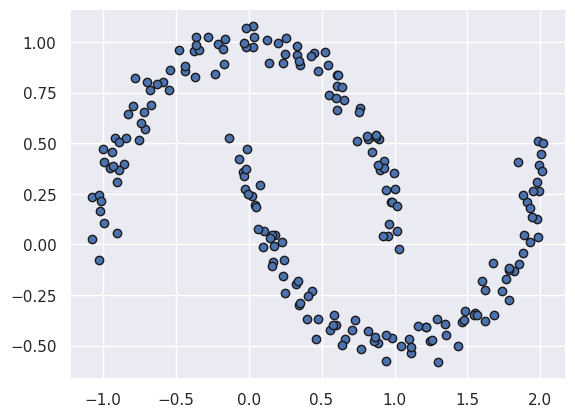

In [20]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1],edgecolor='k');

In [21]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2,edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-21-91261c8d2000>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


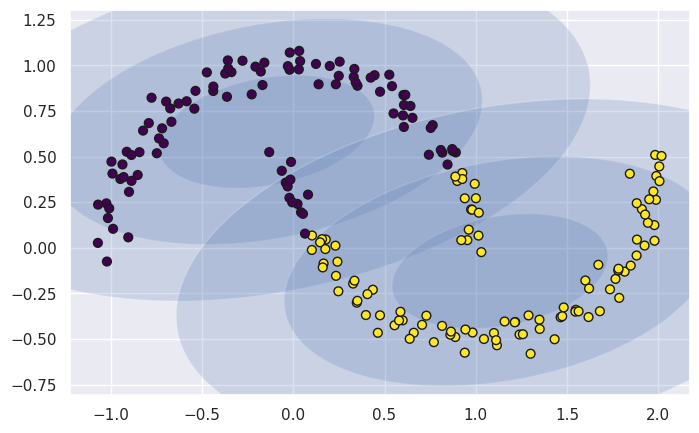

In [22]:
#No.Components determine the gmm structure and its distribution
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8,5))
plot_gmm(gmm2, Xmoon)